# Scala Collections
Coleções em Scala são containers que armazenam sequências de elementos. Elas podem ser mutáveis ou imutáveis, e Scala oferece uma vasta variedade delas. Existem basicamente três tipos principais de coleções em Scala:

* Sequências (Sequences): Como List, Array, Vector, Queue, etc. Elas mantêm a ordem dos elementos.
* Conjuntos (Sets): Como HashSet, TreeSet. Eles armazenam elementos sem qualquer ordem específica e não permitem duplicatas.
* Mapas (Maps): Como HashMap, TreeMap. Eles armazenam pares de chave-valor.

## Operações

#### Builders

Os construtores permitem construir com eficiência uma coleção de objetos de comprimentos desconhecidos, "congelando" na coleção desejada no final. Isso é mais útil para construir matrizes ou coleções imutáveis onde
não é possível adicionar ou remover elementos uma vez que a coleção foi construída

In [1]:
val b = Array.newBuilder[Int]
// mutable.ArrayBuilder

Intitializing Scala interpreter ...

Spark Web UI available at http://mirian:4040
SparkContext available as 'sc' (version = 3.3.1, master = local[*], app id = local-1697547044490)
SparkSession available as 'spark'


b: scala.collection.mutable.ArrayBuilder[Int] = ArrayBuilder.ofInt


In [2]:
b += 1
b += 2

res0: b.type = ArrayBuilder.ofInt


In [3]:
b.result()

res1: Array[Int] = Array(1, 2)


#### Factory Methods
É uma maneira de instanciar collections alternativa ao uso de construtores.

In [4]:
Array.fill(5)("Hello")

res2: Array[String] = Array(Hello, Hello, Hello, Hello, Hello)


In [5]:
Array.tabulate(5)(n => s"hello $n")

res3: Array[String] = Array(hello 0, hello 1, hello 2, hello 3, hello 4)


In [6]:
Array(1,2,3) ++ Array(4,5,6)

res4: Array[Int] = Array(1, 2, 3, 4, 5, 6)


### Transforms

As transformações pegam uma coleção existente e criam uma nova coleção modificada; elas criam cópias da coleção original e deixam o original inalterado

In [7]:
val a = Array(1, 2, 3, 4, 5)
val a2 = a.map(x => x + 10)
print(a)
print(a2)

[I@5ee1a0e7[I@4e9cc67c

a: Array[Int] = Array(1, 2, 3, 4, 5)
a2: Array[Int] = Array(11, 12, 13, 14, 15)


### Queries

As queries permitem pesquisar elementos em sua coleção retornando um booleano indicando se o elemento foi encontrado ou não. Pode ser útil pra encontrar elementos em colections sem precisar de for

In [8]:
Array(1,2,3,4,5,6,7).find(i => i % 2 == 0 && i > 4)

res6: Option[Int] = Some(6)


In [9]:
Array(1,2,3,4,5,6,7).find(i => i % 2 == 0 && i > 10)

res7: Option[Int] = None


In [10]:
Array(1,2,3,4,5,6,7).exists(x => x > 1)

res8: Boolean = true


In [11]:
Array(1,2,3,4,5,6,7).exists(_ < 0)

res9: Boolean = false


### mkString

Transforma a coleção em string de acordo com o separador dado

In [12]:
Array(1, 2, 3, 4, 5, 6, 7).mkString(",")

res10: String = 1,2,3,4,5,6,7


In [13]:
Array(1, 2, 3, 4, 5, 6, 7).mkString("[", ",", "]")

res11: String = [1,2,3,4,5,6,7]


In [22]:
Vector(1, 2, 3, 4, 5, 6, 7).mkString("{", ",", "}")

res16: String = {1,2,3,4,5,6,7}


### foldLeft

Combina a função e o valor inicial pra produzir um resultado final

In [14]:
Array(1, 2, 3, 4, 5, 6, 7).foldLeft(0)((x, y) => x + y) 

//equivalente a:
//  {
//  var total = 0
//  for (i <- Array(1, 2, 3, 4, 5, 6, 7)) total += i
//  total
// }

res12: Int = 28


In [15]:
Array(1, 2, 3, 4, 5, 6, 7).foldLeft(1)(_ * _)

res13: Int = 5040


In [16]:
Array(1, 2, 3, 4, 5, 6, 7).foldLeft(2)((x, y) => x + y) 

res14: Int = 30


### groupBy

Agrupa a coleção em coleções menores

In [17]:
val grouped = Array(1, 2, 3, 4, 5, 6, 7).groupBy(_ % 2)

grouped: scala.collection.immutable.Map[Int,Array[Int]] = Map(1 -> Array(1, 3, 5, 7), 0 -> Array(2, 4, 6))


### Converters

In [18]:
// assim não funciona
// Array(1, 2, 3).to(Vector) 
val arr = Array(1, 2, 3)
val vec = arr.toVector

arr: Array[Int] = Array(1, 2, 3)
vec: Vector[Int] = Vector(1, 2, 3)


In [19]:
// assim não funciona
// Vector(1, 2, 3).to(Array)
val vector = Vector(1, 2, 3)
val array = vector.toArray

vector: scala.collection.immutable.Vector[Int] = Vector(1, 2, 3)
array: Array[Int] = Array(1, 2, 3)


In [20]:
// assim não funciona
// Array(1, 1, 2, 2, 3, 4).to(Set)
val array = Array(1,2,3)
val set = array.toSet

array: Array[Int] = Array(1, 2, 3)
set: scala.collection.immutable.Set[Int] = Set(1, 2, 3)


### Views

Ao encadear múltiplas transformações em uma coleção, estamos criando muitas coleções intermediárias que são imediatamente descartadas, isso pode se tornar um gargalo de desempenho. As views são lazy evaluation, ou seja, permitem diversas operações em coleções sem relamente aplicar essas operações até que algo seja feito.

Por exemplo, se você tiver uma coleção de um milhão de elementos e usar uma view para map e filter, mas no final só pegar os primeiros 10 elementos usando *take(10)*, as operações de map e filter só serão aplicadas a esses 10 elementos, e não a todos os um milhão.

Isso reduz a quantidade de processamento desnecessário e alocações de memória.

In [25]:
// sem usar views
val lista = (1 to 1000000).toList
val resultado = lista.map(_ * 2).filter(_ % 3 == 0).take(10)
print(resultado)

List(6, 12, 18, 24, 30, 36, 42, 48, 54, 60)

lista: List[Int] = List(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 1...


Neste caso, a lista original será transformada em outra lista com todos os números multiplicados por 2, e em seguida, uma nova lista será criada contendo apenas números divisíveis por 3. A operação final (take(10)) pegará os primeiros 10 números desta última lista. Isso significa que houve processamento e alocação de memória para um milhão de números, mesmo que só precisássemos do resultado de 10 números no final.


In [26]:
// usando views
val lista = (1 to 1000000).view
val resultado = lista.map(_ * 2).filter(_ % 3 == 0).take(10).toList

lista: scala.collection.SeqView[Int,scala.collection.immutable.IndexedSeq[Int]] = SeqView(...)
resultado: List[Int] = List(6, 12, 18, 24, 30, 36, 42, 48, 54, 60)


Aqui, graças à view, as operações de map e filter são adiadas. Quando chamamos take(10).toList, as operações são aplicadas apenas aos primeiros 10 números que satisfazem as condições, em vez de serem aplicadas a todos os um milhão de números. Isso economiza muito em termos de processamento e memória.

## Immutable Collections

Coleções imutáveis excluem uma classe inteira de bugs por modificações inesperadas e são especialmente úteis em cenários multi-thread, que requerem segurança ao passar as coleções entre threads.
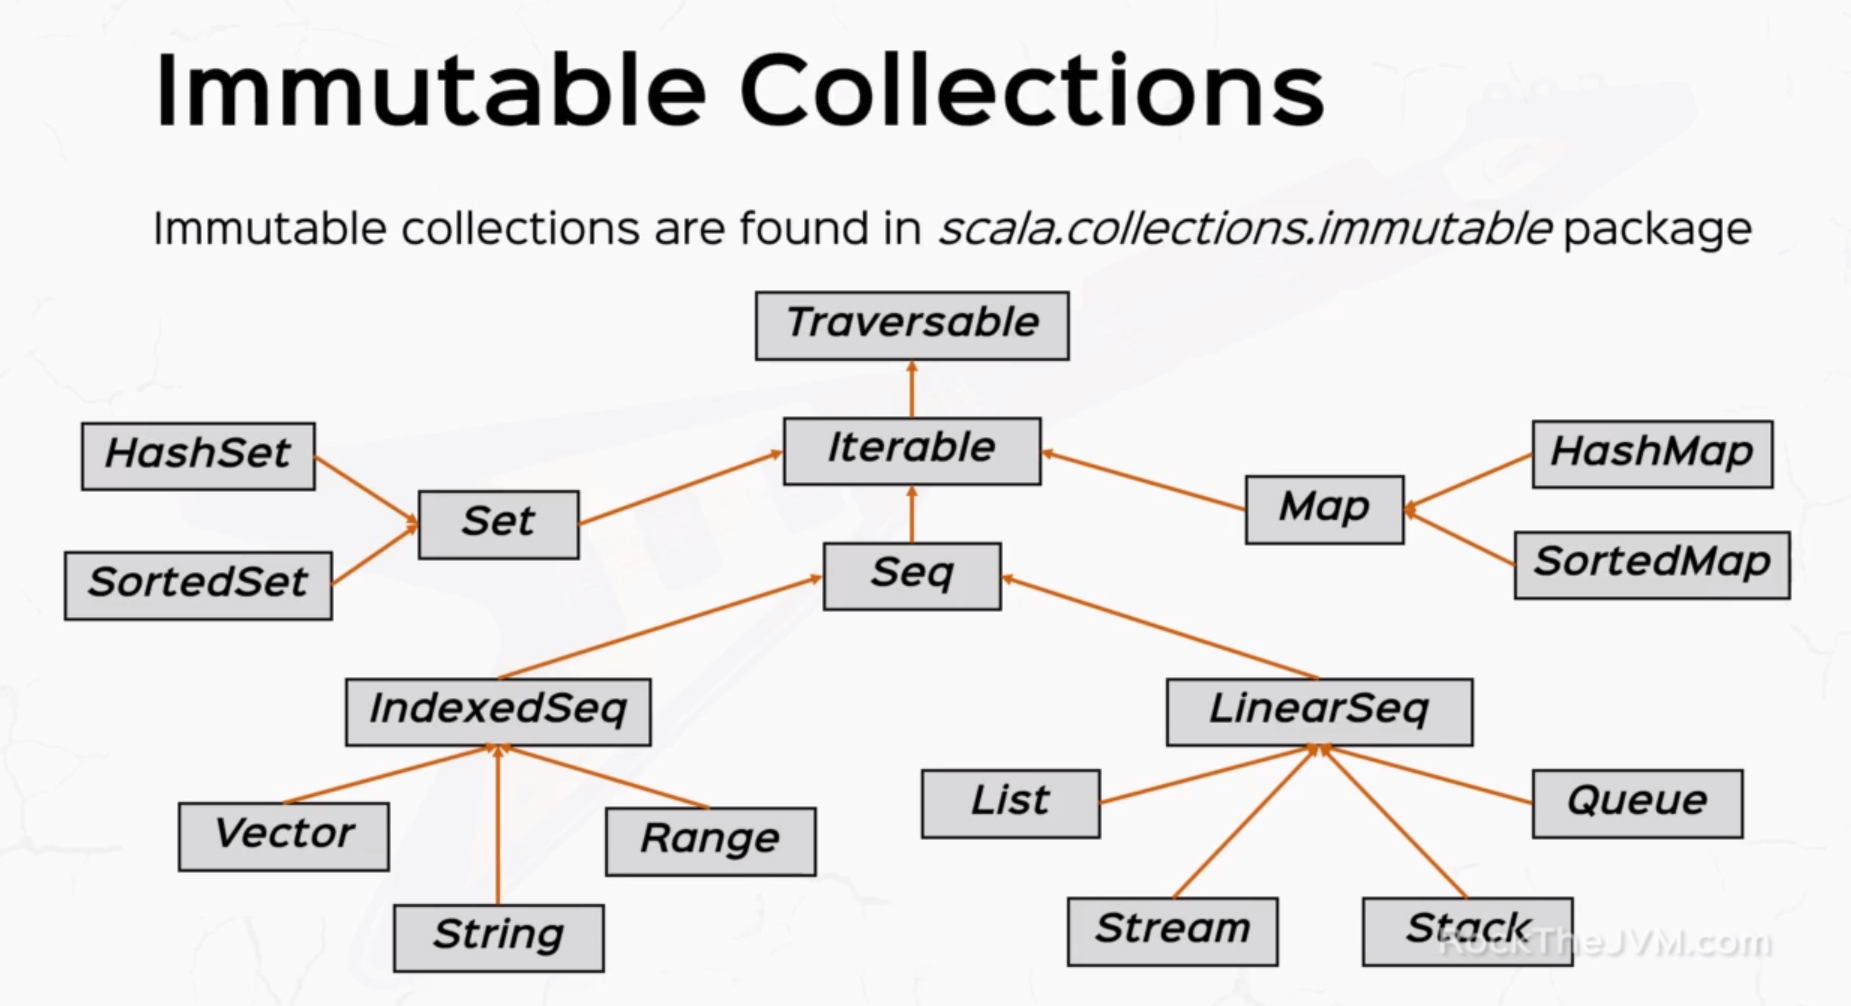

### Sequences

Interface geral pra estruturas de dados que tem uma ordem bem definida e podem ser indexadas

In [41]:
val aSequence = Seq(3,1,2,4)
println(s"aSequence: $aSequence")
println(s"aSequence reverse: " + aSequence.reverse)
println(s"aSequence [2]: " + aSequence(2))
println(s"aSequence ++: " + (aSequence ++ Seq(7,5,6).sorted))
println(aSequence.sorted)

aSequence: List(3, 1, 2, 4)
aSequence reverse: List(4, 2, 1, 3)
aSequence [2]: 2
aSequence ++: List(3, 1, 2, 4, 5, 6, 7)
List(1, 2, 3, 4)


aSequence: Seq[Int] = List(3, 1, 2, 4)


Por razões de eficiência e por convenção, quando usa Seq para criar uma sequência, Scala retorna uma instância da coleção List. A List é uma implementação padrão de uma sequência imutável em Scala.

### Immutable Vectors

Vetores são sequências lineares imutáveis e de tamanho fixo. Eles suportam o mesmo conjunto de operações que arrays ou outras coleções fazem. Usar Vetores é útil quando você tem uma sequência que você sabe que não muda, mas precisa de flexibilidade na forma como você trabalha com ela.

### Immutable Sets

### Immutable Maps

### Immutable Lists

## Mutable Collections
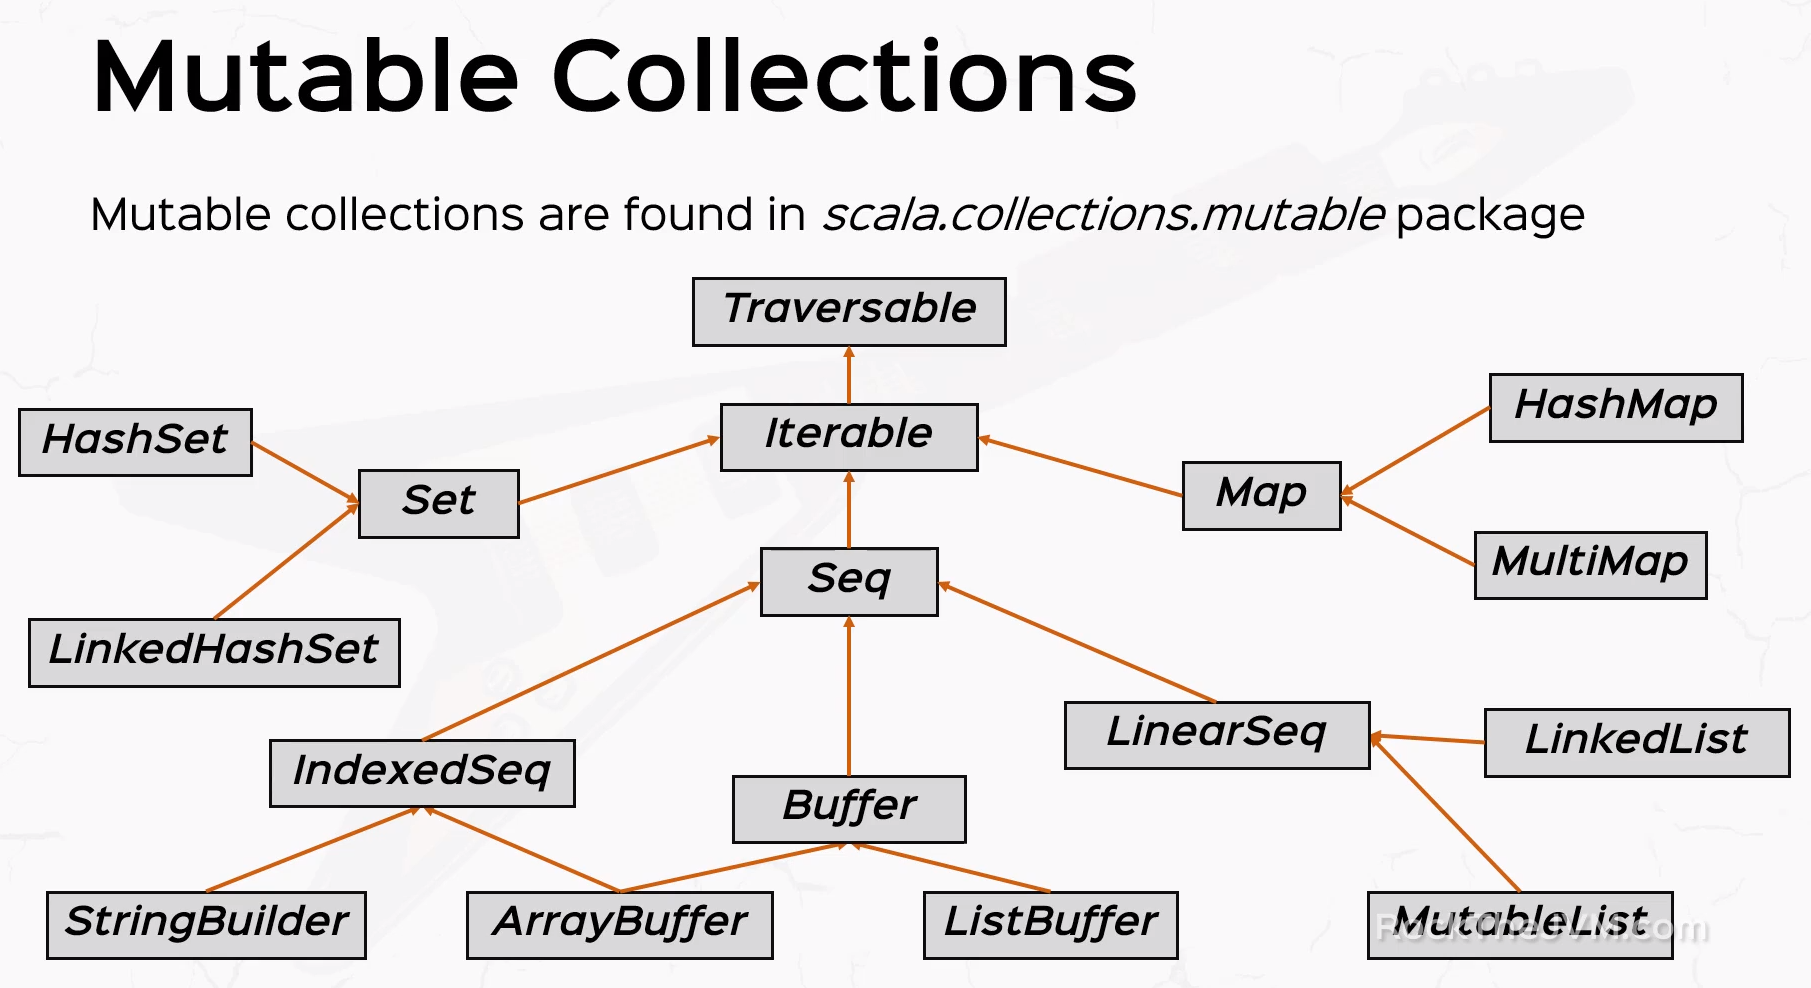

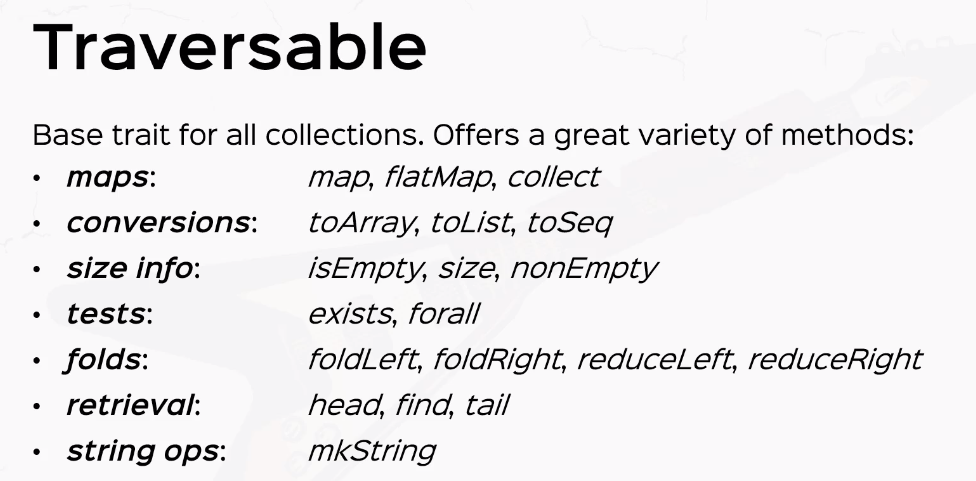

## tldr collections mutáveis e imutáveis


### Coleções Imutáveis:
1. **Sequências**:
   - `List`: Uma lista encadeada.
   - `Vector`: Uma estrutura de dados balanceada por árvores.
   - `Stream` (em versões mais antigas de Scala) ou `LazyList` (em versões mais recentes): Lazy evaluation.

2. **Conjuntos** (`Set`):
   - `HashSet`: Um conjunto baseado em tabela hash.
   - `TreeSet`: Um conjunto baseado em árvore balanceada.

3. **Mapas** (`Map`):
   - `HashMap`: Um mapa baseado em tabela hash.
   - `TreeMap`: Um mapa baseado em árvore balanceada.

### Coleções Mutáveis:
1. **Sequências**:
   - `ArrayBuffer`: Uma sequência dinâmica.
   - `ListBuffer`: Otimizada para a construção rápida de listas imutáveis.
   - `StringBuilder`: Especializada em caracteres.

2. **Conjuntos** (`Set`):
   - `HashSet`: Um conjunto baseado em tabela hash.
   - `TreeSet`: Um conjunto baseado em árvore balanceada.
   - `LinkedHashSet`: Mantém a ordem de inserção.

3. **Mapas** (`Map`):
   - `HashMap`: Um mapa baseado em tabela hash.
   - `TreeMap`: Um mapa baseado em árvore balanceada.
   - `LinkedHashMap`: Mantém a ordem de inserção.

4. **Outras Coleções Mutáveis**:
   - `Queue`: Representa uma fila.
   - `Stack`: Representa uma pilha (embora em versões mais recentes do Scala, o uso de `Stack` seja desencorajado em favor de outras estruturas).
